**Consideraciones**
- Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).
<br>`data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)`
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**
- Eliminar la columna `X1` y hacer un get dummies.

**KMeans**
- Probar con `n_clusters=3`.
- Gráfico 3D para las columnas `x='gender', y='age', z='calories'` y `color='activity'`

**HDBSCAN**
- Probar con `min_cluster_size=80`.
---

**Output**

Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.

1) Cargamos datos

In [2]:
import pandas as pd

In [ ]:
!pip install funpymodeling

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [4]:
from funpymodeling.exploratory import status

In [5]:
import seaborn as sns
import numpy as np


In [ ]:
!pip install -U gdown

In [ ]:
!gdown --folder "https://drive.google.com/drive/folders/1x52GNuNBLScYvNmd0b3Acl4FfgvElQTu"

1) Cargamos los datos

In [8]:
import pandas as pd
data = pd.read_csv("/content/jueves_tarea__dataset/aw_fb_data.csv", sep=",", index_col=0)
display(data.head())

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


2) Preparación de datos



In [9]:
data1 = data.copy()

In [10]:
status(data1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


In [11]:
data1 = data1.drop(["X1"], axis=1)

3) AED & Storytelling

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

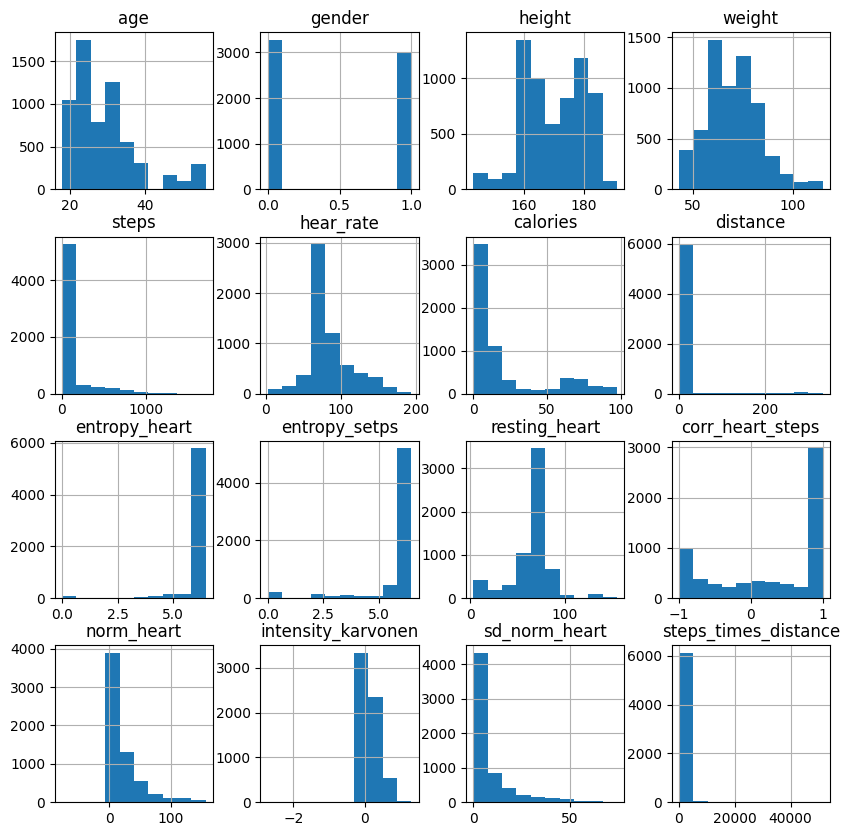

In [12]:
data1.hist(figsize = (10,10))

In [13]:
ProfileReport(data1, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:00<00:00, 72.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aplicación de get dummies

In [14]:
# Apply one-hot encoding to 'device' and 'activity' columns
data1 = pd.get_dummies(data1, columns=['device','activity'], drop_first=True)

4) Clustering con k-means

4.1) Tenemos que normalizar los datos (z-score)

In [15]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(data1)
x_data_norm=std_scaler.transform(data1)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,...,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6264.000000,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03
mean,2.268655e-17,2.177909e-16,-5.172533e-16,3.720594e-16,1.814924e-16,9.074620e-17,1.814924e-16,-1.814924e-17,-9.165366e-16,7.985665e-16,...,9.074620e-17,-1.179701e-16,3.629848e-17,-9.074620e-18,0.000000,-2.608953e-17,-2.949251e-17,4.991041e-17,-3.913430e-17,5.671637e-18
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,...,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-1.252603e+00,-9.541166e-01,-2.587115e+00,-1.978652e+00,-4.873068e-01,-2.929548e+00,-7.109949e-01,-3.011055e-01,-7.877479e+00,-4.569150e+00,...,-3.391563e+00,-1.360661e+01,-6.471041e-01,-1.452030e-01,-0.844599,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
25%,-6.913270e-01,-9.541166e-01,-9.404466e-01,-7.147873e-01,-4.686358e-01,-3.680869e-01,-6.861079e-01,-3.006985e-01,1.021668e-01,1.348908e-01,...,-6.736987e-01,-6.906303e-01,-6.259839e-01,-1.450410e-01,-0.844599,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
50%,-1.300505e-01,-9.541166e-01,-1.655436e-01,-1.200273e-01,-4.464951e-01,-3.098031e-01,-5.665760e-01,-2.971593e-01,2.083702e-01,3.321103e-01,...,-3.682165e-01,-3.601110e-01,-4.162532e-01,-1.419133e-01,-0.844599,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
75%,4.312259e-01,1.048090e+00,9.968107e-01,5.713812e-01,-1.667584e-02,3.325684e-01,3.765169e-02,4.059042e-02,2.842709e-01,4.043337e-01,...,2.397301e-01,2.673566e-01,1.251642e-01,-1.221373e-01,1.183993,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
max,3.013097e+00,1.048090e+00,2.062302e+00,3.374187e+00,7.201889e+00,3.776815e+00,2.857381e+00,6.991359e+00,5.818567e-01,5.856720e-01,...,4.792777e+00,5.417012e+00,5.293335e+00,1.253348e+01,1.183993,2.365097e+00,2.291614e+00,2.150112e+00,2.458886e+00,2.394887e+00


4.2) Creación del modelo

In [16]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100,
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, random_state=0)

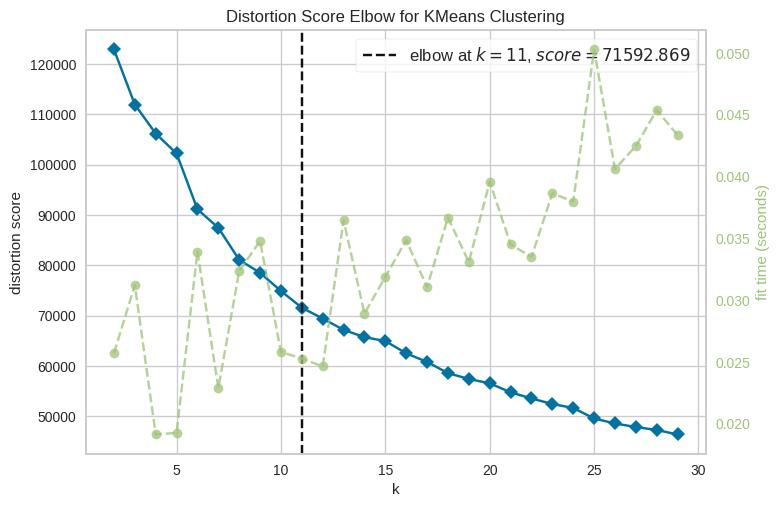

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [17]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from copy import deepcopy

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

In [18]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl2=data1.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [19]:
x_data_cl2['gender'] = x_data_cl2['gender'].astype(str)
x_data_cl2['age'] = x_data_cl2['age'].astype(str)
x_data_cl2['cluster'] = x_data_cl2['cluster'].astype(str)
#Aplicar a todas las variables categoricas

In [20]:
x_data_cl2

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device_fitbit,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.138520,1.000000,0.089692,False,False,False,False,False,False,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.137967,1.000000,0.102088,False,False,False,False,False,False,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.138587,1.000000,0.115287,False,False,False,False,False,False,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.139208,1.000000,0.129286,False,False,False,False,False,False,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.139828,0.241567,0.144088,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,True,False,False,True,False,False,1
6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,True,False,False,True,False,False,1
6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,True,False,False,True,False,False,1
6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,True,False,False,True,False,False,1


In [21]:
d3=x_data_cl2.sample(n=600)

In [22]:
# Usamos la maravilla de plotly
import plotly.express as px
# Copiamos la columna 'activity' original de data hacia d3
d3['activity'] = data['activity']


fig = px.scatter_3d(d3, x='gender', y='age', z='calories', color='activity')
fig.show()

5) Clustering con HDBSCAN

5.1) Creación del modelo

In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

In [25]:
# Crear el modelo con tamaño mínimo de cluster = 80
model_hdb = hdbscan.HDBSCAN(min_cluster_size=80)

# Ajustar el modelo a los datos normalizados o filtrados
model_hdb.fit(data1)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



HDBSCAN(min_cluster_size=80)

In [26]:
# Nro de cluster
model_hdb.labels_

array([ 1,  1,  1, ..., -1, -1, -1])

In [27]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,3385,0.54039,0.54039
1,1,1482,0.23659,0.77698
2,2,1226,0.195722,0.972701
3,0,171,0.027299,1.0


4 clusters

Y uno de ellos es de ruido (indicado por el -1)

In [28]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=data1.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb.labels_ # ojo aca! el predict es de los datos normalizados

In [29]:
x_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device_fitbit,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.138520,1.000000,0.089692,False,False,False,False,False,False,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.137967,1.000000,0.102088,False,False,False,False,False,False,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.138587,1.000000,0.115287,False,False,False,False,False,False,1
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.139208,1.000000,0.129286,False,False,False,False,False,False,1
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.139828,0.241567,0.144088,False,False,False,False,False,False,1


In [30]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

In [31]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

In [32]:
data_check=data1.copy()
data_check['cluster']=model_hdb.labels_
#data_check=data_check[['cluster', 'track_name']]

In [33]:
data_check.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device_fitbit,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.138520,1.0,0.089692,False,False,False,False,False,False,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.137967,1.0,0.102088,False,False,False,False,False,False,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.138587,1.0,0.115287,False,False,False,False,False,False,1


**Calculo de silhoutte**

Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(data1, model_hdb.labels_)

In [35]:
# Nos da el promedio global
sil_avg

-0.2131761258813888

In [36]:
## Nos da el valor para cada registro
sample_silhouette_values = silhouette_samples(data1, model_hdb.labels_)

In [37]:
sample_silhouette_values

array([ 0.68689583,  0.69189334,  0.69630099, ..., -0.94439933,
       -0.94439933, -0.94439933])

In [38]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb.labels_})

<Axes: xlabel='cluster', ylabel='sil_value'>

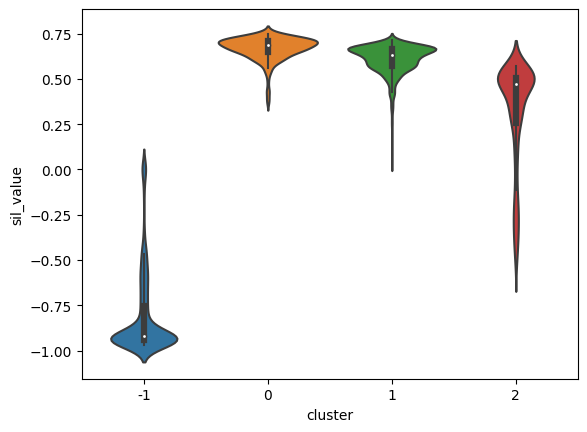

In [ ]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value',fill=True)

/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.12/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

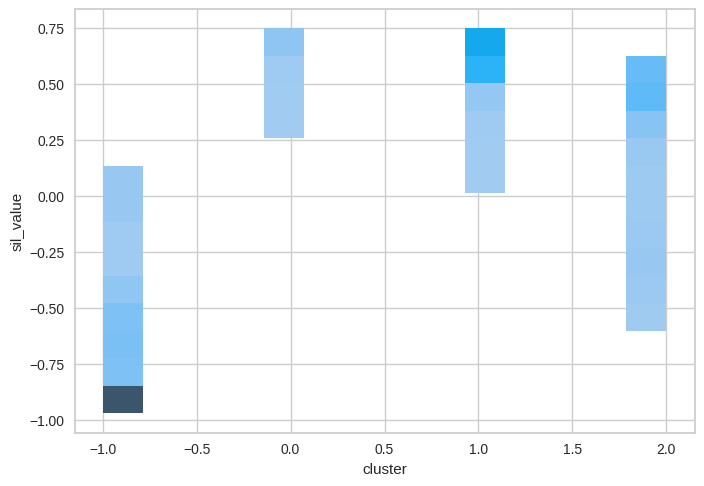

In [ ]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

In [ ]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.809048
0,0.668569
1,0.608557
2,0.315731


**Output**

Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.

## KMEans
A partir del clustering K-Means con ayuda del gráfico 3D podemos sacar las siguientes conclusiones:


1.   Las actividades que representan mayor intensidad (Running) son las que más calorias queman en contraste con las de menor intensidad (Lying y Sitting), siendo el tipo de actividad factor importante en el gasto calórico
2.   El gasto calórico no parece ser afectado por el género, ya que a lo largo del eje correspondiente, los puntos se distribuyen de forma similar
3. El gasto calórico es indistinto a la edad, personas jovenes y mayores muestran rangos de calorías similares dentro de una misma categoría de ejercicio






## HDBSCAN
A partir del HDBSCAN con ayuda del gráfico de violín podemos observar:


1.   El Cluster -1 tiene mucha dispersión, es decir tiene muchos puntos que no pudieron ser asignados a un cluster denso
2.   Los Cluster 0 y 1 tienen valores altos, podemos decir que los puntos que contienen cada Cluster estan muy próximos entre sí
3. El Cluster 2 contiene puntos más dispersos, más cercanos a 0, por lo que tienen valores límites con otros clusters.

